In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from skimage.util import random_noise
from skimage.exposure import match_histograms

In [3]:
img = cv2.imread("1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

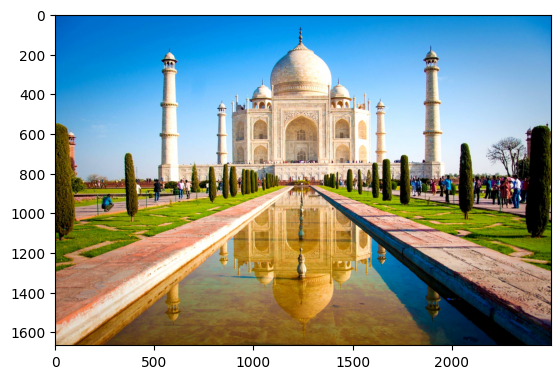

In [4]:
plt.imshow(img)

In [10]:
def gaussian_noise(img):
    row,col,ch = img.shape
    mean = 0
    var = 100
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch).astype(np.uint8)
    noisy = cv2.add(img,gauss)
    return noisy

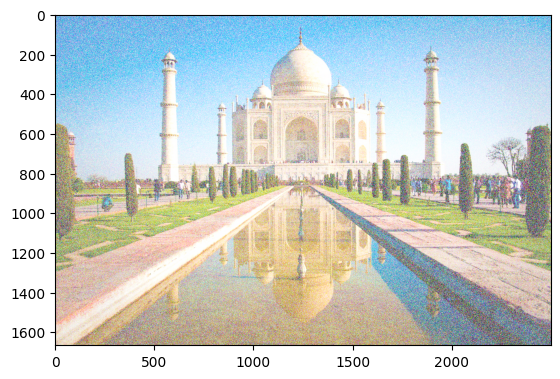

In [11]:
#Custom implementation of gaussian noise, not sure if it's correct
noisy = gaussian_noise(img)
plt.imshow(noisy)

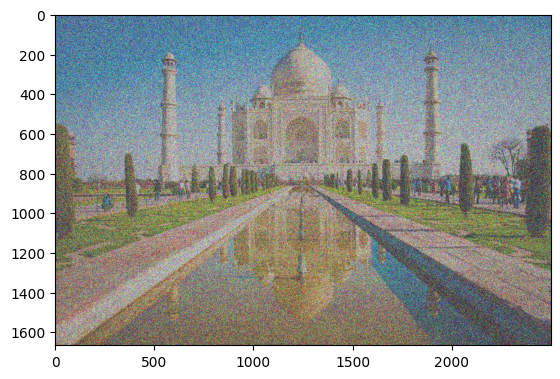

In [15]:
#Use this
noisy_image_gaussian = random_noise(img, mode='gaussian', var=1)
plt.imshow(noisy_image_gaussian)

In [37]:
def uniform_noise(img):
    row,col,ch = img.shape
    noise = np.random.uniform(low=0, high=120, size=img.shape).astype(np.uint8)
    # noise = np.zeros((row,col,ch))
    # cv2.randu(noise,0,100)
    # noise = (noise).astype(np.uint8)
    noisy = cv2.add(img,noise)
    # Other way to add noise
    # noisy = img + noise
    # noisy = np.clip(noisy)
    return noisy

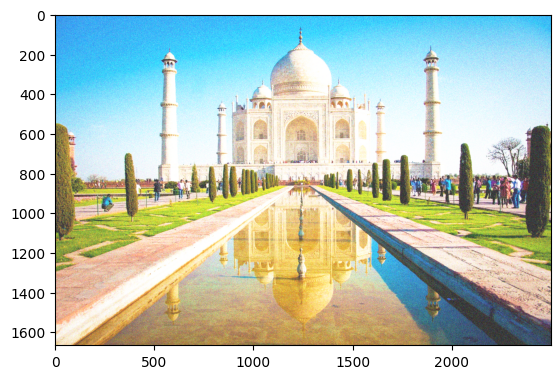

In [38]:
noisy = uniform_noise(img)
plt.imshow(noisy)

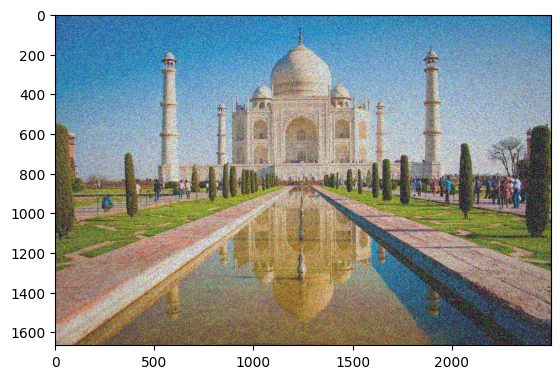

In [8]:
noisy_image_salt_pepper = random_noise(img, mode='s&p', amount=0.4)
plt.imshow(noisy_image_salt_pepper)

In [44]:
gaussian_blur = cv2.GaussianBlur(img, (9,9), 0)
median_blur = cv2.medianBlur(img, 9)
mean_blur = cv2.blur(img, (9, 9))

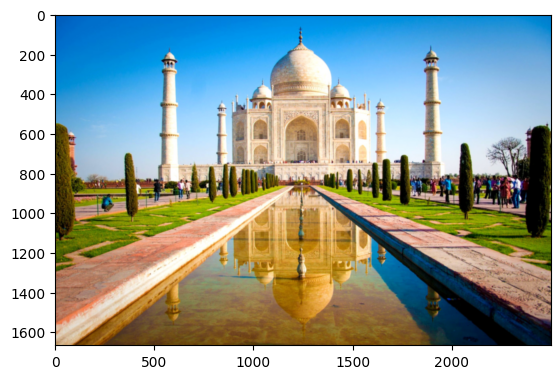

In [45]:
plt.imshow(gaussian_blur)

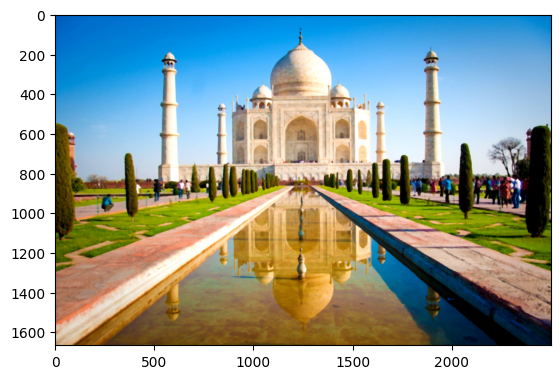

In [46]:
plt.imshow(median_blur)

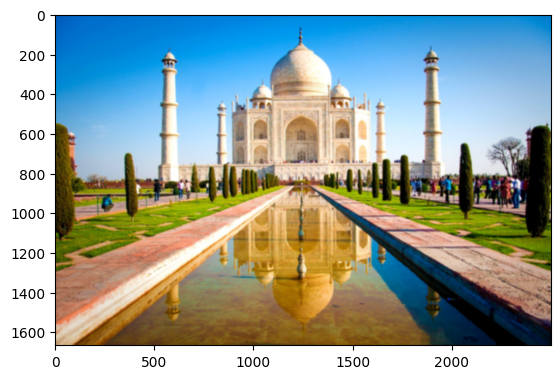

In [47]:
plt.imshow(mean_blur)

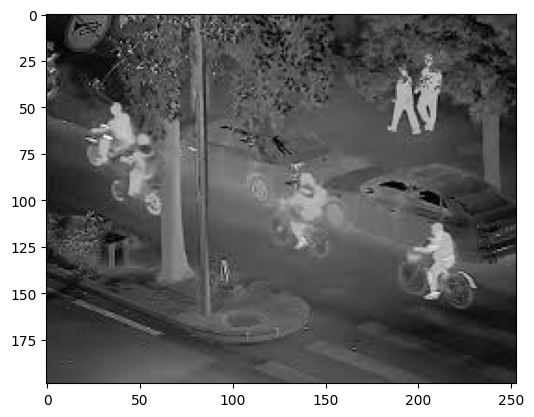

In [9]:
img2 = cv2.imread("NightVision.jpg")
plt.imshow(img2)

In [10]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [11]:
gray.shape

(199, 253)

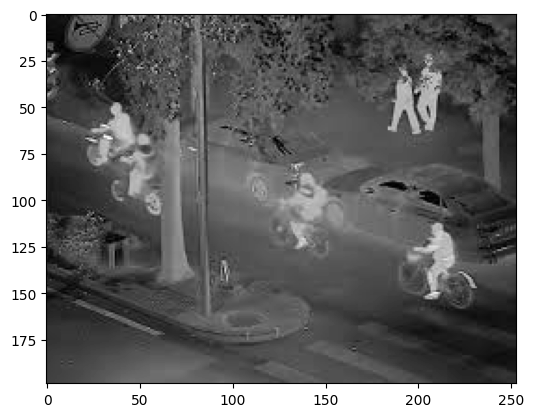

In [12]:
plt.imshow(gray, cmap='gray')

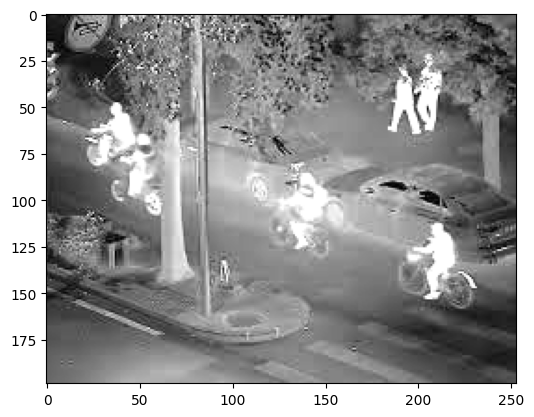

In [15]:
contrasted_image = cv2.convertScaleAbs(img2, alpha=1.6, beta=2.4)
plt.imshow(contrasted_image, cmap='gray')

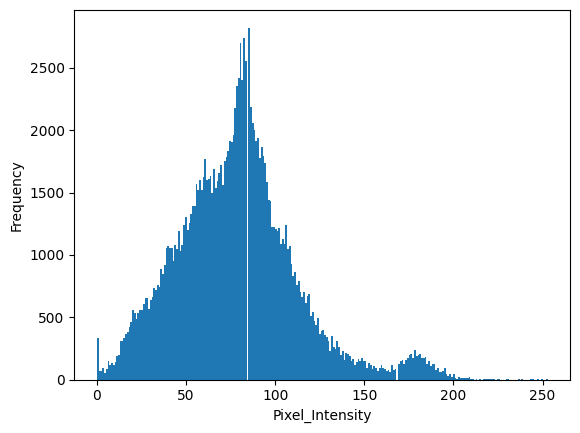

In [18]:
plt.hist(img2.ravel(), bins=256)
plt.xlabel('Pixel_Intensity')
plt.ylabel('Frequency')
plt.show()

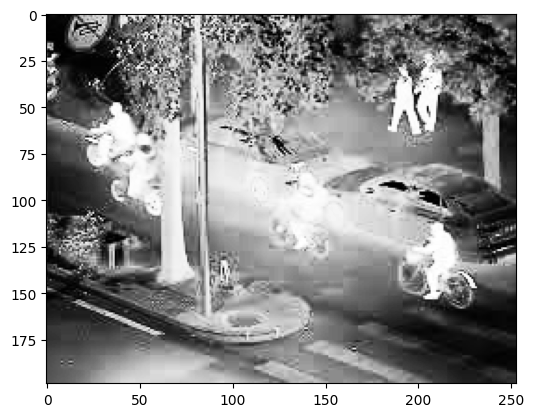

In [19]:
equ = cv2.equalizeHist(gray)
plt.imshow(equ, cmap='gray')

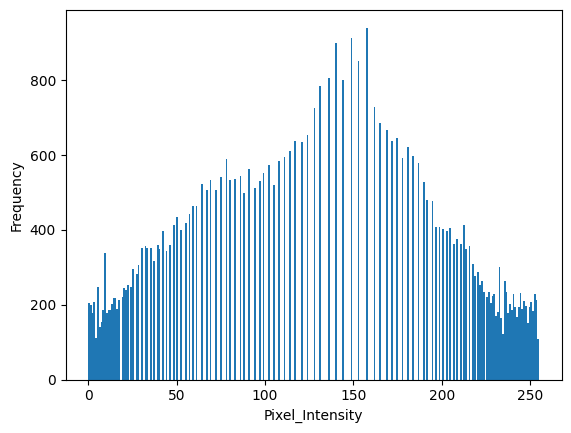

In [21]:
plt.hist(equ.ravel(), bins=256)
plt.xlabel('Pixel_Intensity')
plt.ylabel('Frequency')
plt.show()

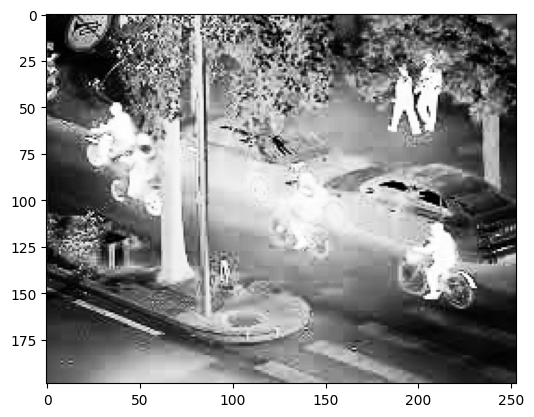

In [30]:
matched = match_histograms(gray, equ)
plt.imshow(matched, cmap='gray')